### GALTON BOARD

**Galton's Board Simulation**
This Python program simulates the behavior of balls falling through a Galton's Board, also known as a "bean machine" or "Plinko board." Galton's Board is a physical device that demonstrates the central limit theorem in statistics.

In this simulation, balls are dropped from the top of the board and bounce randomly left or right at each peg until they reach the bottom, where they are collected in bins. Over time, as more balls are dropped, the distribution of balls in the bins approaches a bell-shaped curve, illustrating the central limit theorem.


***Getting Started***
Installation: This program requires Python 3 and the following libraries: random, matplotlib. If you haven't already, you can install matplotlib using pip:

pip install matplotlib

Custom Layout: You can modify the layout of the Galton board by changing the custom_layout variable in the code. Ensure that the first row has only a single peg, which serves as the entry point for the balls.

Example custom layout:

***custom_layout***= [
    [0, 0, 0, 0, 0, **X**, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [# ...],
]


Run the Simulation: Execute the code in your Python environment. When prompted, enter the number of balls you want to simulate.

View Results: The program will display the results in two ways:

As a bell curve (probability distribution) using a histogram.
As a visual representation of the number of balls in each bin (dots).
Code Structure
standard_galton(peg_layout, b): Simulates the movement of balls through the Galton board.
print_graph(dataset, as_bell_curve=False): Displays the simulation results graphically.
Example usage and custom layout are provided in the code.

#### DISCLAIMER: Code may not depict the actual outcome of a Galton board as it doesn't consider other factors like size, vibration etc.

In [1]:
##RUN FIRST
import random
import matplotlib.pyplot as plt


def generate_layout_with_preference(num_columns, num_rows, x_position):
    # Function to generate a layout with user preference for the position of 'X'
    symbols = [0, 1]

    # Create the first row with zeros and set 'X' at the specified position
    first_row = [0] * num_columns
    first_row[x_position - 1] = 'X'

    # Create the rest of the layout with mixed symbols
    generated_layout = [first_row] + [[random.choice(symbols) for _ in range(num_columns)] for _ in range(num_rows - 1)]

    return generated_layout



def transform_layout(layout, x_value):
    # Function to transform the layout, adding base and modifying values
    rows = len(layout)
    cols = len(layout[0])

    # Generate the base dynamically based on the number of columns
    base = [1 if i % 2 == 0 else 0 for i in range(cols)]

    # Add the base to the layout
    layout.append(base)

    # Create a new layout with additional columns on the left and right
    new_layout = [[2] + row + [2] for row in layout]

    # Add additional row at the bottom
    new_layout.append([2] * (cols + 2))

    # Modify values at [0][0] and [0][-1]
    new_layout[0][0] = 0
    new_layout[0][-1] = 0

    # Replace 'X' with the user input value
    for row in new_layout:
        for i in range(len(row)):
            if row[i] == 'X':
                row[i] = x_value

    print('Layout of Galton board')
    for row in new_layout:
      print(row)

    return new_layout

def find_entry_point(layout):
    # Function to find the entry point in the layout
    for col in range(len(layout[0])):
        if layout[0][col] > 0:
            return col
    return None

def simulate_galton_board(layout):
    # Function to simulate the Galton board and calculate the distribution
    rows = len(layout)
    cols = len(layout[0])

    entry_point = find_entry_point(layout)
    if entry_point is None:
        print("No entry point found.")
        return

    ball_matrix = [[0] * cols for _ in range(rows)]
    ball_matrix[0][entry_point] = layout[0][entry_point]

    for i in range(1, rows):
        for j in range(cols):
            for ball in range(ball_matrix[i - 1][j]):
                if layout[i - 1][j] == 1:
                    random_percentage = random.uniform(0, 1)
                    left_diagonal = j - 1 if j - 1 >= 0 else 0
                    right_diagonal = j + 1 if j + 1 < cols else j

                    if left_diagonal == 0 and layout[i - 1][j] == 1:
                        ball_matrix[i][right_diagonal] += 1
                    elif right_diagonal == cols - 1 and layout[i - 1][j] == 1:
                        ball_matrix[i][left_diagonal] += 1
                    else:
                        ball_matrix[i][left_diagonal] += 1 if random_percentage < 0.5 else 0
                        ball_matrix[i][right_diagonal] += 1 if random_percentage >= 0.5 else 0
                else:
                    ball_matrix[i][j] += 1

    return ball_matrix

def print_galton_board(matrix):
    # Function to print the Galton board matrix
    matrix = [row[1:-1] for row in matrix[1:]]
    for row in matrix:
        print(row)

def plot_galton_board(layout):
    # Function to plot the distribution from the Galton board simulation
    final_matrix = simulate_galton_board(layout)
    last_row = final_matrix[-1]
    data_to_plot = [value for index, value in enumerate(last_row[1:-1]) if index % 2 == 1]

    plt.bar(range(len(data_to_plot)), data_to_plot, color='blue', alpha=0.7, align='edge', width=1.0)
    plt.xlabel('Column')
    plt.ylabel('Number of Balls')
    plt.title('Distribution')
    plt.show()

    print_dot_curve(data_to_plot)

def print_dot_curve(dataset):
    # Function to print a dot curve representation of the distribution
    print("\n")
    print('Dots to shows Ball distribution')
    for val in dataset:
        for _ in range(val):
            print('.', end='')
        print(val)

### **Custom Layout**
If you choose to use a custom layout, you can modify the custom_layout list in the script. Each sublist represents a row in the Galton Board, and 'X' represents the starting point of the ball.

**custom_layout** = [
    [0, 0, 0, 0, 0, 0, 0, 'X', 0, 0],
    ... (other rows)
]

## ***Edit Layout Below***

In [2]:
#Point X is the Entry point
## Thus simulation starts from second row.
## Only indicate point of Entry X in the first Row and others can be change
Edit_layout =[
        [0, 0, 0, 0, 0, 0, 0, 'X', 0, 0],
        [1, 0, 1, 0, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
        [0, 1, 1, 0, 0, 1, 1, 1, 1, 0],
        [1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
        [0, 0, 1, 1, 1, 0, 1, 0, 1, 1],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
        [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 0, 0],
    ]

**#### ASK USER CHOICE.**

**Generated:** layout is automatically generated.

**Custom:** You can Edit and make layout of your choice.

In [6]:
##RUN NEXT
# Ask the user if they want to generate a layout or use a custom one
generate_layout_option = input("Do you want to generate a layout? (Y/N): ").lower()

Do you want to generate a layout? (Y/N): n


In [7]:
## RUN NEXT
if generate_layout_option == 'y':
    num_columns = int(input("Enter the number of columns: "))
    num_rows = int(input("Enter the number of rows: "))

    # Initialize a counter for the number of invalid inputs
    invalid_input_count = 0

    while True:
        user_input = input(f"Skip or Enter the position of 'X' in the first row (1 to {num_columns}): ")

        if user_input:
            x_position = int(user_input)
            if 1 <= x_position <= num_columns:
                break  # Break the loop if the input is valid
            else:
                print("Invalid input. Please enter a position within the valid range.")
                invalid_input_count += 1
        else:
            x_position = random.randint(1, num_columns)
            break  # Break the loop if a random position is generated

        if invalid_input_count > 1:
            print("Input exceeded more than twice. The position of 'X' will be randomly generated.")
            x_position = random.randint(1, num_columns)
            break  # Break the loop if more than two invalid inputs

    layout = generate_layout_with_preference(num_columns, num_rows, x_position)

else:
    custom_layout = Edit_layout  # Assuming Edit_layout is your custom layout variable
    # x_position = random.randint(1, len(custom_layout[0]))  # Randomly select position for 'X'
    layout = custom_layout


Enter number of balls 'X': 1000
Layout of Galton board
[0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0]
[2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2]
[2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2]
[2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2]
[2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2]
[2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2]
[2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2]
[2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2]
[2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2]
[2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2]
[2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]




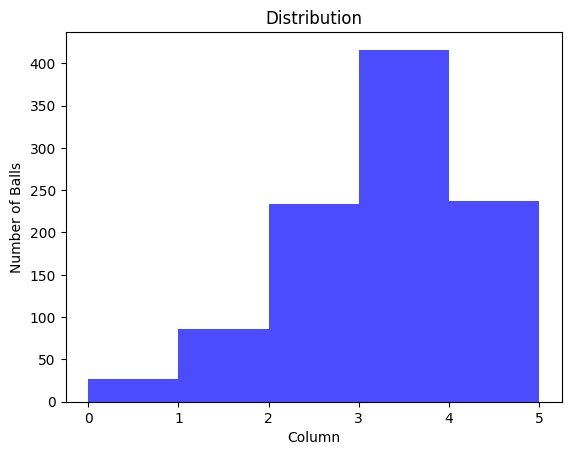



Dots to shows Ball distribution
...........................27
......................................................................................86
..........................................................................................................................................................................................................................................234
................................................................................................................................................................................................................................................................................................................................................................................................................................416
.............................................................................................................................................................................................

In [8]:
## RUN Next
user_input = int(input("Enter number of balls 'X': "))
new_layout = transform_layout(layout, user_input)
print("\n")
plot_galton_board(new_layout)
print("\n")
print('Position at each step')
print_galton_board(simulate_galton_board(new_layout))